# PROJECT INFERENTIAL STATISTICS

## Problem 1
### A physiotherapist with a male football team is interested in studying the relationship between foot injuries and the positions at which the players play from the data collected.

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols    
from statsmodels.stats.anova import _get_covariance,anova_lm
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [106]:
data = {'Position': ['Striker', 'Forward', 'Attacking Midfielder', 'Winger'],'Players Injured': [45, 56, 24, 20],'Players Not Injured': [32, 38, 11, 9]}

In [107]:
df_problem1 = pd.DataFrame(data)

In [108]:
df_problem1.head()

,Position,Players Injured,Players Not Injured
0,Striker,45,32
1,Forward,56,38
2,Attacking Midfielder,24,11
3,Winger,20,9


In [109]:
df_problem1.shape

(4, 3)

In [110]:
df_problem1.dtypes

Position               object
Players Injured         int64
Players Not Injured     int64
dtype: object

In [111]:
df_problem1.isnull().sum()

Position               0
Players Injured        0
Players Not Injured    0
dtype: int64

In [112]:
df_problem1.describe()

,Players Injured,Players Not Injured
count,4.000000,4.000000
mean,36.250000,22.500000
std,17.134274,14.662878
min,20.000000,9.000000
25%,23.000000,10.500000
50%,34.500000,21.500000
75%,47.750000,33.500000
max,56.000000,38.000000


### 1.1 What is the probability that a randomly chosen player would suffer an injury?

In [113]:
total_injured = df_problem1["Players Injured"].sum()
total_players = df_problem1[["Players Injured", "Players Not Injured"]].sum().sum()
prob_injury = total_injured / total_players
print("The probability that a randomly chosen player would suffer an injury is", prob_injury)

The probability that a randomly chosen player would suffer an injury is 0.6170212765957447


### 1.2 What is the probability that a player is a forward or a winger?

In [114]:
frds = df_problem1.loc[df_problem1["Position"] == "Forward", "Players Injured"].values[0] + df_problem1.loc[df_problem1["Position"] == "Forward", "Players Not Injured"].values[0]
wngs = df_problem1.loc[df_problem1["Position"] == "Winger", "Players Injured"].values[0] + df_problem1.loc[df_problem1["Position"] == "Winger", "Players Not Injured"].values[0]
total_players = df_problem1[["Players Injured", "Players Not Injured"]].sum().sum()
prob_frds_or_wngs = (frds + wngs) / total_players
print("the probability that a player is a forward or a winger is:", prob_frds_or_wngs)

the probability that a player is a forward or a winger is: 0.5234042553191489


### 1.3 What is the probability that a randomly chosen player plays in a striker position and has a foot injury?

In [115]:
stkr_injured = df_problem1.loc[df_problem1["Position"] == "Striker", "Players Injured"].values[0]
total_players = df_problem1[["Players Injured", "Players Not Injured"]].sum().sum()
prob_stkr_foot_injury = stkr_injured / total_players
print("Probability that a randomly chosen player plays in a striker position and has a foot injury:", prob_stkr_foot_injury)

Probability that a randomly chosen player plays in a striker position and has a foot injury: 0.19148936170212766


### 1.4 What is the probability that a randomly chosen injured player is a striker?

In [116]:
total_injured_players = df_problem1["Players Injured"].sum()

prob_injured_stkr = stkr_injured / total_injured_players

print("Probability that a randomly chosen injured player is a striker:", prob_injured_stkr)


Probability that a randomly chosen injured player is a striker: 0.3103448275862069


## Problem 2
### The breaking strength of gunny bags used for packaging cement is normally distributed with a mean of 5 kg per sq. centimeter and a standard deviation of 1.5 kg per sq. centimeter. The quality team of the cement company wants to know the following about the packaging material to better understand wastage or pilferage within the supply chain

### 2.1 What proportion of the gunny bags have a breaking strength less than 3.17 kg per sq cm?

In [117]:
mu = 5
sigma = 1.5
breaking_strength1 = 3.17
prop_1 = stats.norm.cdf(breaking_strength1, mu, sigma)
print(f"Proportion with breaking strength < {breaking_strength1} kg/cm²: {prop_1:.4f}")

Proportion with breaking strength < 3.17 kg/cm²: 0.1112


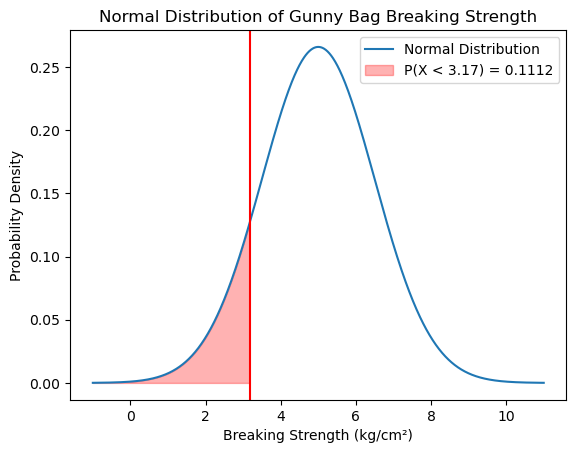

In [118]:
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
pdf = stats.norm.pdf(x, mu, sigma)

plt.plot(x, pdf, label='Normal Distribution')
plt.axvline(x=breaking_strength1, c="r")
x_fill = np.linspace(x.min(), breaking_strength1, 1000)
plt.fill_between(x_fill, stats.norm.pdf(x_fill, mu, sigma), color="r", alpha=0.3, label=f'P(X < {breaking_strength1}) = {prop_1:.4f}')
plt.xlabel("Breaking Strength (kg/cm²)")
plt.ylabel("Probability Density")
plt.title("Normal Distribution of Gunny Bag Breaking Strength")
plt.legend()
plt.show()

### 2.2 What proportion of the gunny bags have a breaking strength at least 3.6 kg per sq cm.?

In [119]:
mu=5
sigma=1.5
breaking_strength2=3.6
prop_2=1-stats.norm.cdf(breaking_strength2, mu, sigma)
print(f"Proportion with breaking strength >= {breaking_strength2} kg/cm²: {prop_2:.4f}")

Proportion with breaking strength >= 3.6 kg/cm²: 0.8247


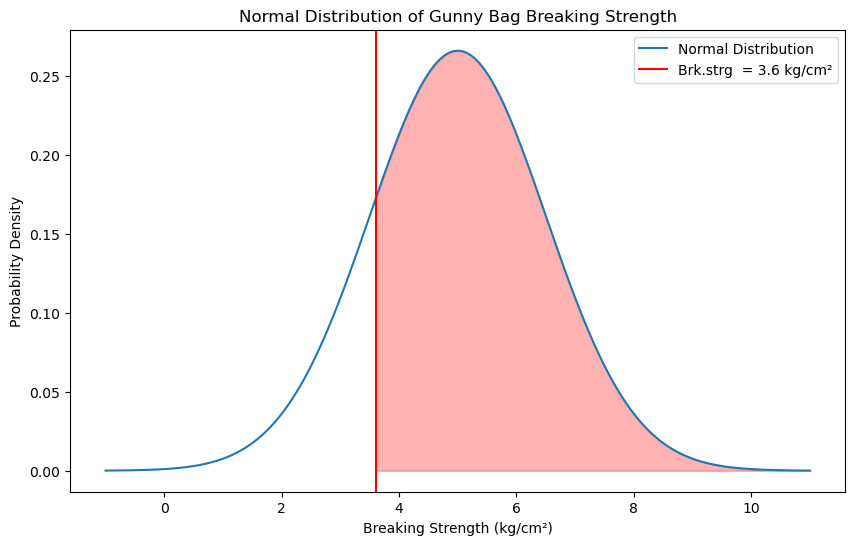

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Normal Distribution')
plt.axvline(x=breaking_strength2, c="r", label=f'Brk.strg  = {breaking_strength2} kg/cm²')
x_fill = np.linspace(breaking_strength2, x.max(), 1000)
plt.fill_between(x_fill, stats.norm.pdf(x_fill, mu, sigma), color="r", alpha=0.3)
plt.xlabel("Breaking Strength (kg/cm²)")
plt.ylabel("Probability Density")
plt.title("Normal Distribution of Gunny Bag Breaking Strength")
plt.legend()
plt.show()

### 2.3 What proportion of the gunny bags have a breaking strength between 5 and 5.5 kg per sq cm.?

In [121]:
l_bound1 = 5
u_bound1 = 5.5
prop_3 = stats.norm.cdf(u_bound1, mu, sigma) - stats.norm.cdf(l_bound1, mu, sigma)
print(f"Proportion with breaking strength between {l_bound1} and {u_bound1} kg/cm²: {prop_3:.4f}")

Proportion with breaking strength between 5 and 5.5 kg/cm²: 0.1306


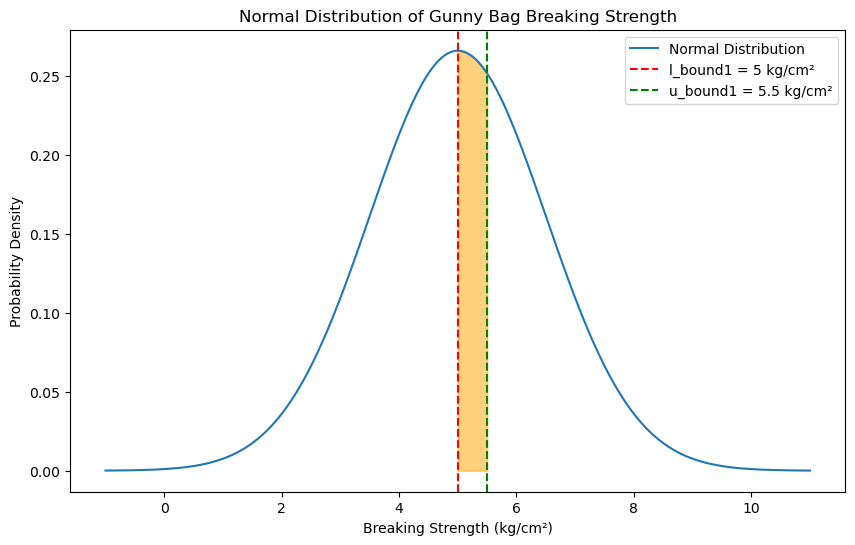

In [122]:
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Normal Distribution')
plt.axvline(x=l_bound1, c="r", linestyle='--', label=f'l_bound1 = {l_bound1} kg/cm²')
plt.axvline(x=u_bound1, c="g", linestyle='--', label=f'u_bound1 = {u_bound1} kg/cm²')
x_fill = np.linspace(l_bound1, u_bound1, 1000)
plt.fill_between(x_fill, stats.norm.pdf(x_fill, mu, sigma), color="orange", alpha=0.5)
plt.xlabel("Breaking Strength (kg/cm²)")
plt.ylabel("Probability Density")
plt.title("Normal Distribution of Gunny Bag Breaking Strength")
plt.legend()
plt.show()


### 2.4 What proportion of the gunny bags have a breaking strength NOT between 3 and 7.5 kg per sq cm.?

In [123]:
l_bound2 = 3
u_bound2 = 7.5
prop_4 = stats.norm.cdf(l_bound2, mu, sigma) + (1 - stats.norm.cdf(u_bound2, mu, sigma))
print(f"Proportion with breaking strength NOT between {l_bound2} and {u_bound2} kg/cm²: {prop_4:.4f}")

Proportion with breaking strength NOT between 3 and 7.5 kg/cm²: 0.1390


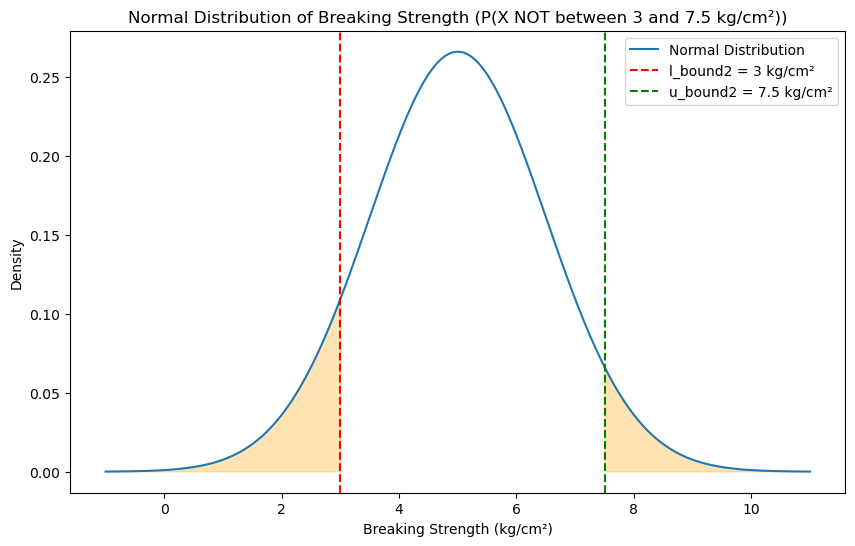

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Normal Distribution')
plt.axvline(x=l_bound2, c="r", linestyle='--', label=f'l_bound2 = {l_bound2} kg/cm²')
plt.axvline(x=u_bound2, c="g", linestyle='--', label=f'u_bound2 = {u_bound2} kg/cm²')
plt.fill_between(x, 0, pdf, where=(x <= l_bound2) | (x >= u_bound2), color='orange', alpha=0.3,)
plt.title('Normal Distribution of Breaking Strength (P(X NOT between 3 and 7.5 kg/cm²))')
plt.xlabel('Breaking Strength (kg/cm²)')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

## Problem 3
### Zingaro stone printing is a company that specializes in printing images or patterns on polished or unpolished stones. However, for the optimum level of printing of the image, the stone surface has to have a Brinell's hardness index of at least 150. Recently, Zingaro has received a batch of polished and unpolished stones from its clients.

In [125]:
df_problem3 = pd.read_csv('Zingaro_Company.csv')
df_problem3.head()

,Unpolished,Treated and Polished
0,164.481713,133.209393
1,154.307045,138.482771
2,129.861048,159.665201
3,159.096184,145.663528
4,135.256748,136.789227


In [126]:
df_problem3.shape

(75, 2)

In [127]:
df_problem3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unpolished            75 non-null     float64
 1   Treated and Polished  75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [128]:
df_problem3.isnull().sum()

Unpolished              0
Treated and Polished    0
dtype: int64

In [129]:
df_problem3.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.110527,147.788117
std,33.041804,15.587355
min,48.406838,107.524167
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,200.161313,192.272856


In [130]:
df_problem3.columns

Index(['Unpolished ', 'Treated and Polished'], dtype='object')

* Removing the extra space from 'unpolished' column using strip command/

In [131]:
df_problem3.columns = df_problem3.columns.str.strip()
df_problem3.columns

Index(['Unpolished', 'Treated and Polished'], dtype='object')

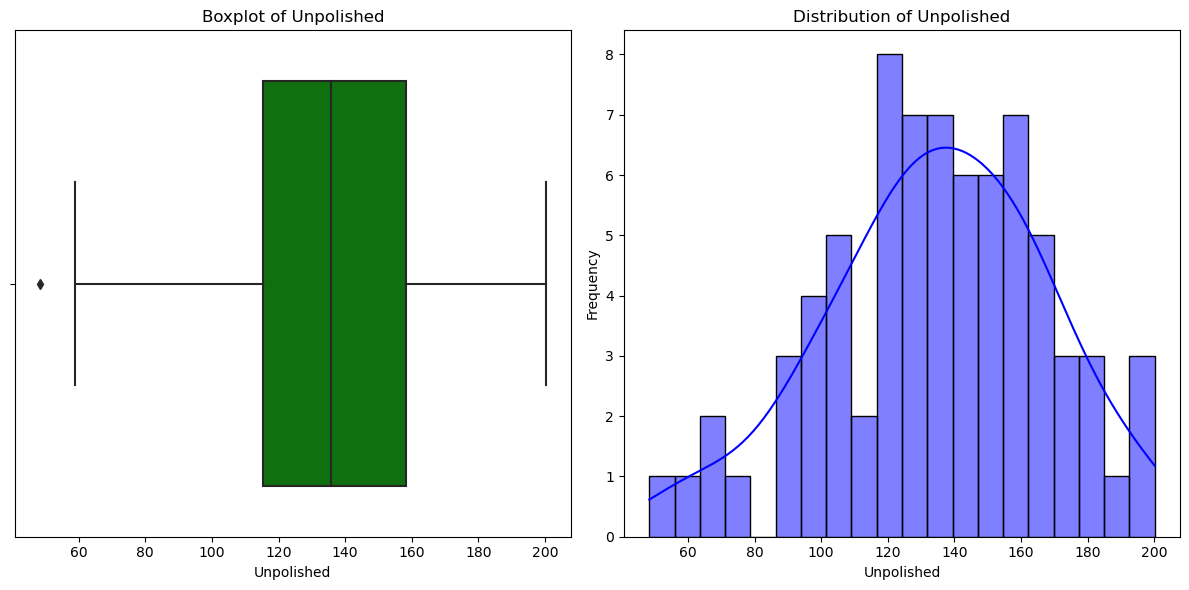

In [132]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df_problem3, x='Unpolished', color='green', ax=display[0])
display[0].set_title('Boxplot of Unpolished')
display[0].set_xlabel('Unpolished')

sns.histplot(df_problem3['Unpolished'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Distribution of Unpolished')
display[1].set_xlabel('Unpolished')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

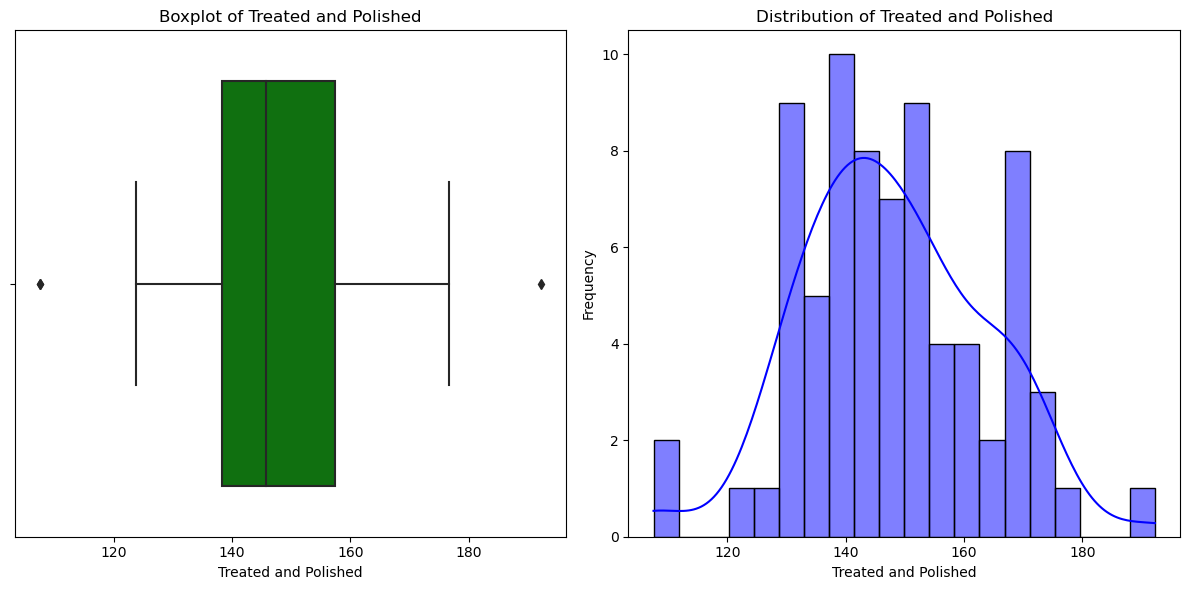

In [133]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df_problem3, x='Treated and Polished', color='green', ax=display[0])
display[0].set_title('Boxplot of Treated and Polished')
display[0].set_xlabel('Treated and Polished')

sns.histplot(df_problem3['Treated and Polished'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Distribution of Treated and Polished')
display[1].set_xlabel('Treated and Polished')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Referring to the above box plots it seems that the two variables Unpolished and 	Treated and Polished have outliers present in the variables.
#### These outlier values needs to be treated and there are several ways of treating them:**
*  Drop the outlier value
*  Replace the outlier value using the IQR
*  We can treat the outliers using percentile or with Inter quartile Range
#### Here, we are using percentile to replace outliersUnpolished

In [134]:
min_Unpolished, max_Unpolished = df_problem3['Unpolished'].quantile([0.05,0.95])
print(min_Unpolished)
print(round(max_Unpolished,2))

73.17833070500001
185.58


In [135]:
df_problem3["Unpolished"] = np.where(df_problem3["Unpolished"] <  min_Unpolished, min_Unpolished, df_problem3["Unpolished"])
df_problem3["Unpolished"] = np.where(df_problem3["Unpolished"] >  max_Unpolished, max_Unpolished, df_problem3["Unpolished"])

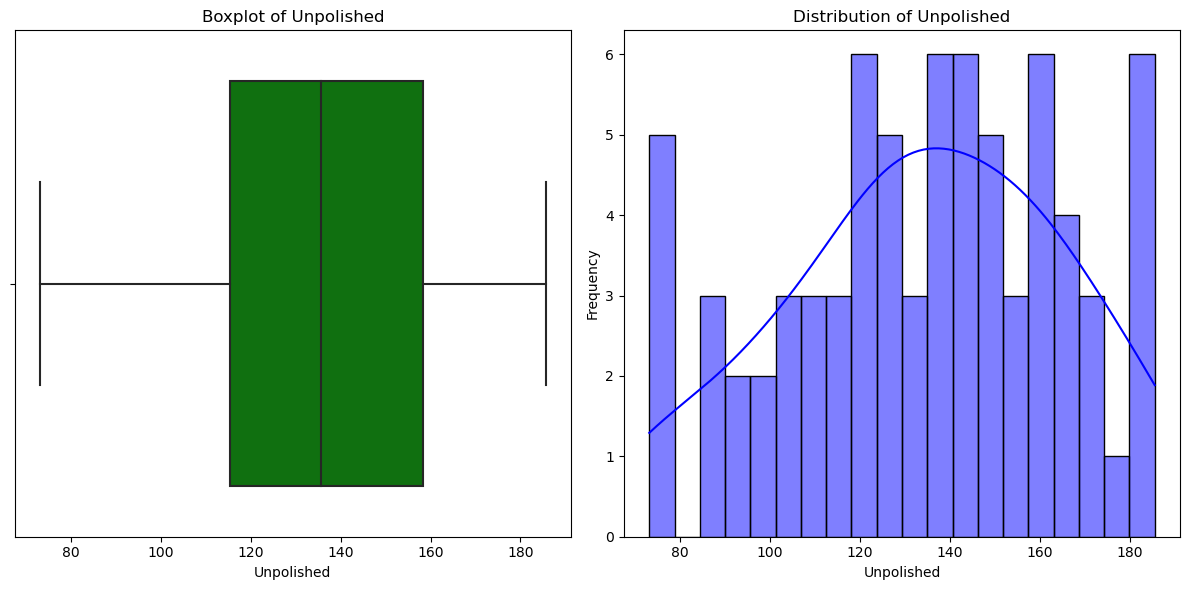

In [136]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df_problem3, x='Unpolished', color='green', ax=display[0])
display[0].set_title('Boxplot of Unpolished')
display[0].set_xlabel('Unpolished')

sns.histplot(df_problem3['Unpolished'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Distribution of Unpolished')
display[1].set_xlabel('Unpolished')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [137]:
min_TreatedandPolished, max_TreatedandPolished = df_problem3['Treated and Polished'].quantile([0.05,0.95])
print(min_TreatedandPolished)
print(round(max_TreatedandPolished,2))

128.35706878000002
171.42


In [138]:
df_problem3["Treated and Polished"] = np.where(df_problem3["Treated and Polished"] <  min_TreatedandPolished, min_TreatedandPolished, df_problem3["Treated and Polished"])
df_problem3["Treated and Polished"] = np.where(df_problem3["Treated and Polished"] >  max_TreatedandPolished, max_TreatedandPolished, df_problem3["Treated and Polished"])

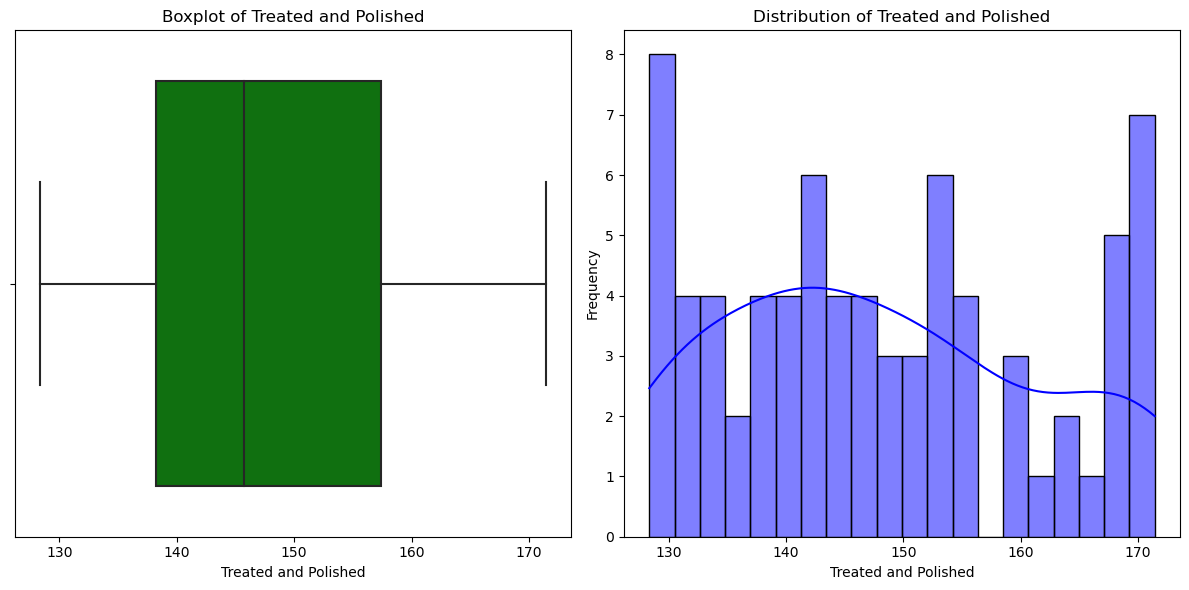

In [139]:
fig, display = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df_problem3, x='Treated and Polished', color='green', ax=display[0])
display[0].set_title('Boxplot of Treated and Polished')
display[0].set_xlabel('Treated and Polished')

sns.histplot(df_problem3['Treated and Polished'], bins=20, kde=True, color='blue', ax=display[1])
display[1].set_title('Distribution of Treated and Polished')
display[1].set_xlabel('Treated and Polished')
display[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [140]:
df_problem3.describe()

,Unpolished,Treated and Polished
count,75.000000,75.000000
mean,134.334853,148.064394
std,30.623973,13.459406
min,73.178331,128.357069
25%,115.329753,138.268300
50%,135.597121,145.721322
75%,158.215098,157.373318
max,185.582012,171.416767


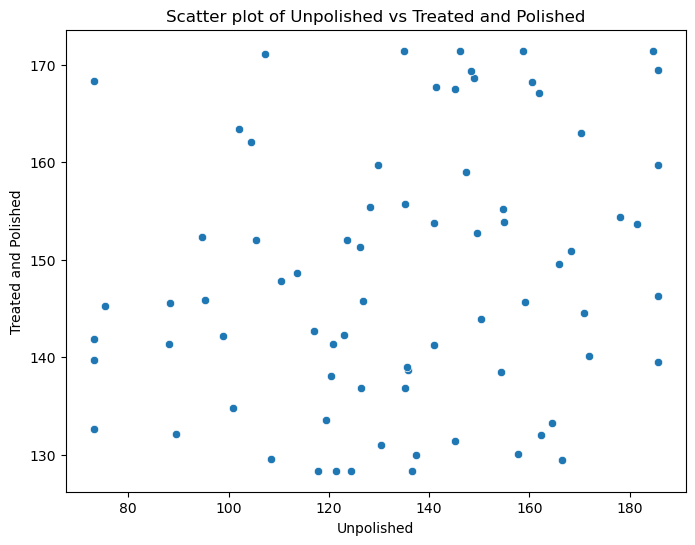

In [141]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_problem3, x='Unpolished', y='Treated and Polished')
plt.title('Scatter plot of Unpolished vs Treated and Polished')
plt.xlabel('Unpolished')
plt.ylabel('Treated and Polished')
plt.show()

### 3.1 Zingaro has reason to believe that the unpolished stones may not be suitable for printing. Do you think Zingaro is justified in thinking so?
##### "- State the null and alternate hypotheses - Conduct the hypothesis test and compute the p-value - Write down conclusions from the test results Note: Consider the level of significance as 5%."

#### Null Hypothesis (H 0​): The mean Brinell hardness of unpolished stones is at least 150.
#### Alternative Hypothesis (H 1​): The mean Brinell hardness of unpolished stones is less than 150.

In [142]:
sample_mean = 134.33
sample_std = 30.62
n = 75
population_mean = 150
alpha = 0.05

In [143]:
unpolished_hardness = df_problem3['Unpolished']
t_stat, p_value = stats.ttest_1samp(unpolished_hardness, 150)
p_value_one_tailed = p_value / 2  # One-tailed test
print(f"One-Sample T-Test for Unpolished Stones: t-statistic = {t_stat:.4f}, p-value (one-tailed) = {p_value_one_tailed:.4f}")

if p_value_one_tailed < 0.05 and t_stat < 0:
    print("Zingaro is justified in thinking the unpolished stones may not be suitable for printing.")
else:
    print("Zingaro is not justified in thinking the unpolished stones may not be suitable for printing.")

One-Sample T-Test for Unpolished Stones: t-statistic = -4.4300, p-value (one-tailed) = 0.0000
Zingaro is justified in thinking the unpolished stones may not be suitable for printing.


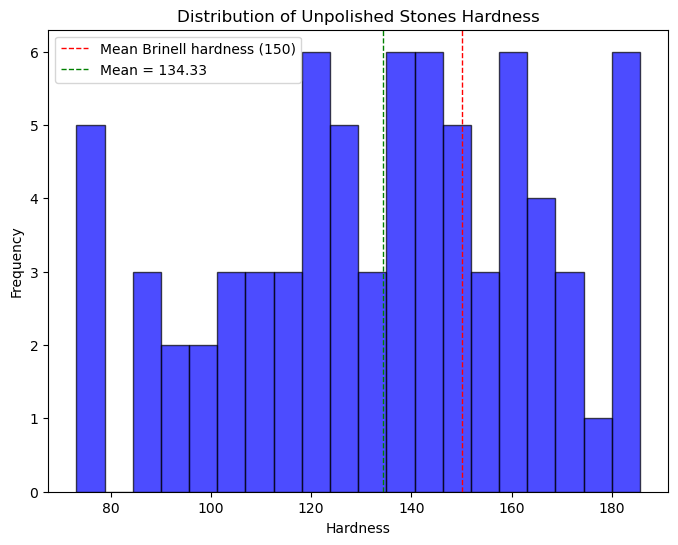

In [144]:
plt.figure(figsize=(8, 6))
plt.hist(unpolished_hardness, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(150, color='red', linestyle='dashed', linewidth=1, label='Mean Brinell hardness (150)')
plt.axvline(unpolished_hardness.mean(), color='green', linestyle='dashed', linewidth=1, label=f'Mean = {unpolished_hardness.mean():.2f}')
plt.title('Distribution of Unpolished Stones Hardness')
plt.xlabel('Hardness')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### 3.2 Is the mean hardness of the polished and unpolished stones the same?

#### Null Hypothesis : The mean hardness of polished stones is equal to the mean hardness of unpolished stones

#### Alternative Hypothesis : The mean hardness of polished stones is not equal to the mean hardness of unpolished stones.

In [145]:
unpolished_hardness = df_problem3['Unpolished']
polished_hardness = df_problem3['Treated and Polished']

# Perform two-sample t-test
t_stat, p_value = stats.ttest_ind(unpolished_hardness, polished_hardness)

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis: The mean hardness of polished and unpolished stones is significantly different.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to say the mean hardness of polished and unpolished stones is different.")

T-statistic: -3.5545
P-value: 0.0005
Reject the null hypothesis: The mean hardness of polished and unpolished stones is significantly different.


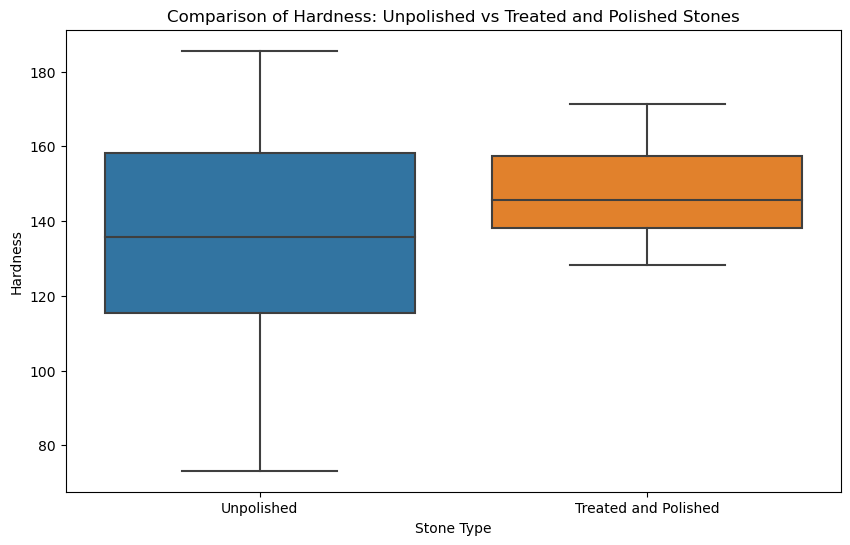

In [146]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[unpolished_hardness, polished_hardness])
plt.title('Comparison of Hardness: Unpolished vs Treated and Polished Stones')
plt.xlabel('Stone Type')
plt.ylabel('Hardness')
plt.xticks(ticks=[0, 1], labels=['Unpolished', 'Treated and Polished'])
plt.show()

## Problem 4
### Dental implant data: The hardness of metal implants in dental cavities depends on multiple factors, such as the method of implant, the temperature at which the metal is treated, the alloy used as well as the dentists who may favor one method above another and may work better in his/her favorite method. The response is the variable of interest.

In [147]:
df_problem4 = pd.read_excel('Dental_Hardness_data.xlsx')

df_problem4.head()

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1.0,1.0,1.0,1500.0,813.0,NaN,NaN,Anova: Two-Factor Without Replication,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1600.0,792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1700.0,792.0,NaN,NaN,SUMMARY,Count,Sum,Average,Variance,NaN,NaN
3,1.0,1.0,2.0,1500.0,907.0,NaN,NaN,1,4,2315,578.75,523721.583333,NaN,NaN
4,1.0,1.0,2.0,1600.0,792.0,NaN,NaN,1,4,2394,598.5,584819,NaN,NaN


In [148]:
df_problem4.shape

(107, 14)

In [149]:
df_problem4.describe()

,Dentist,Method,Alloy,Temp,Response,Unnamed: 5,Unnamed: 6
count,90.000000,90.000000,90.000000,90.000000,90.000000,0.0,0.0
mean,3.000000,2.000000,1.500000,1600.000000,741.777778,NaN,NaN
std,1.422136,0.821071,0.502801,82.107083,145.767845,NaN,NaN
min,1.000000,1.000000,1.000000,1500.000000,289.000000,NaN,NaN
25%,2.000000,1.000000,1.000000,1500.000000,698.000000,NaN,NaN
50%,3.000000,2.000000,1.500000,1600.000000,767.000000,NaN,NaN
75%,4.000000,3.000000,2.000000,1700.000000,824.000000,NaN,NaN
max,5.000000,3.000000,2.000000,1700.000000,1115.000000,NaN,NaN


In [150]:
df_problem4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dentist      90 non-null     float64
 1   Method       90 non-null     float64
 2   Alloy        90 non-null     float64
 3   Temp         90 non-null     float64
 4   Response     90 non-null     float64
 5   Unnamed: 5   0 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   102 non-null    object 
 8   Unnamed: 8   100 non-null    object 
 9   Unnamed: 9   100 non-null    object 
 10  Unnamed: 10  99 non-null     object 
 11  Unnamed: 11  98 non-null     object 
 12  Unnamed: 12  3 non-null      object 
 13  Unnamed: 13  3 non-null      object 
dtypes: float64(7), object(7)
memory usage: 11.8+ KB


In [151]:
df_problem4.columns

Index(['Dentist', 'Method', 'Alloy', 'Temp', 'Response', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

#### Removing the columns named , 'Unamed (5-13)' , as it is not relevant with the problem statements , and creating a new temp df named df_problem4_new

In [152]:
df_problem4_new = df_problem4.drop(columns=['Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'])
df_problem4_new

,Dentist,Method,Alloy,Temp,Response
0,1.0,1.0,1.0,1500.0,813.0
1,1.0,1.0,1.0,1600.0,792.0
2,1.0,1.0,1.0,1700.0,792.0
3,1.0,1.0,2.0,1500.0,907.0
4,1.0,1.0,2.0,1600.0,792.0
...,...,...,...,...,...
102,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN


##### Removing the NaN (missing)  values using the dropna() method.

In [153]:
df_problem4_new = df_problem4_new.dropna()
df_problem4_new

,Dentist,Method,Alloy,Temp,Response
0,1.0,1.0,1.0,1500.0,813.0
1,1.0,1.0,1.0,1600.0,792.0
2,1.0,1.0,1.0,1700.0,792.0
3,1.0,1.0,2.0,1500.0,907.0
4,1.0,1.0,2.0,1600.0,792.0
...,...,...,...,...,...
85,5.0,3.0,1.0,1600.0,483.0
86,5.0,3.0,1.0,1700.0,405.0
87,5.0,3.0,2.0,1500.0,536.0
88,5.0,3.0,2.0,1600.0,405.0


In [154]:
df_problem4_new.describe()

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


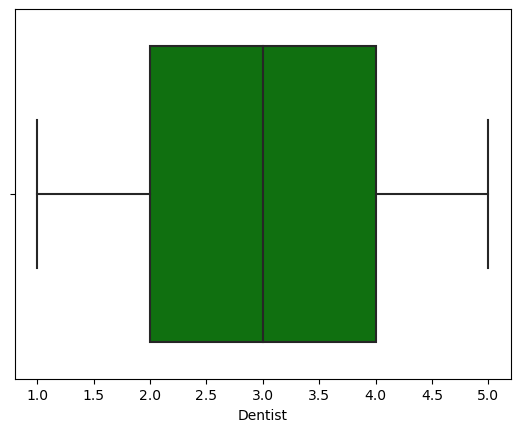

In [155]:
sns.boxplot(data=df_problem4_new, x= 'Dentist', color='green');

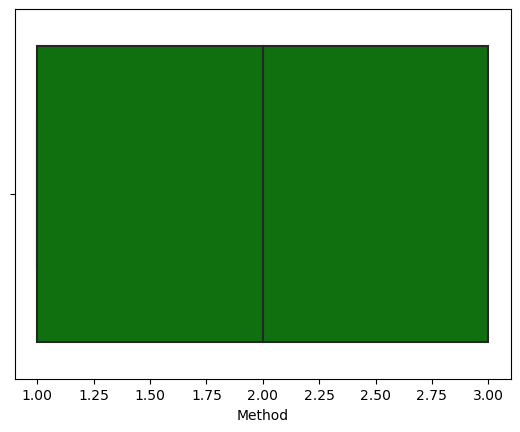

In [156]:
sns.boxplot(data=df_problem4_new, x= 'Method', color='green');

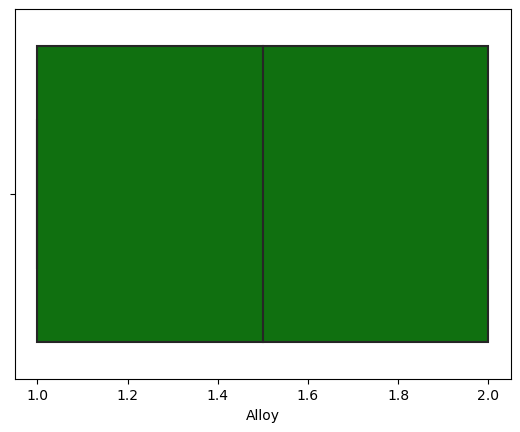

In [157]:
sns.boxplot(data=df_problem4_new, x= 'Alloy', color='green');

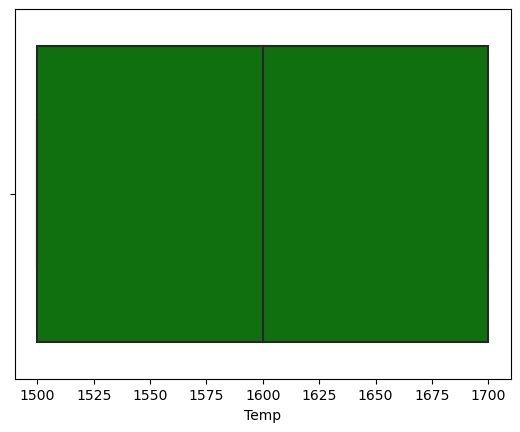

In [158]:
sns.boxplot(data=df_problem4_new, x= 'Temp', color='green');

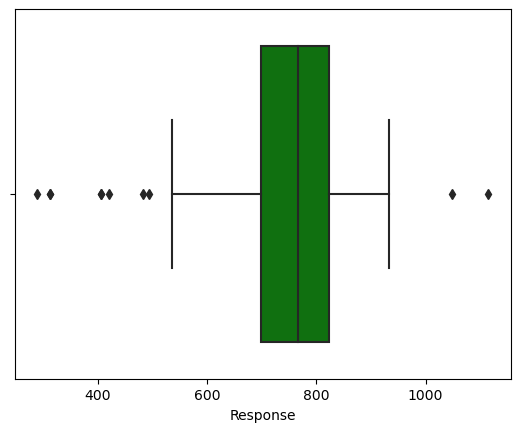

In [159]:
sns.boxplot(data=df_problem4_new, x= 'Response', color='green');

### Referring to the above box plots it seems that the variables 'Response' have outliers present in the variables.**
#### These outlier values needs to be treated and there are several ways of treating them:
* Drop the outlier value
* Replace the outlier value using the IQR
* We can treat the outliers using percentile or with Inter quartile Range
#### Here, we are using IQR to replace outliers

In [160]:
Q1 = df_problem4_new['Response'].quantile(0.25)
Q3 = df_problem4_new['Response'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
df_problem4_new1 = df_problem4_new[(df_problem4_new['Response'] >= Q1 - threshold * IQR) & (df_problem4_new['Response'] <= Q3 + threshold * IQR)]

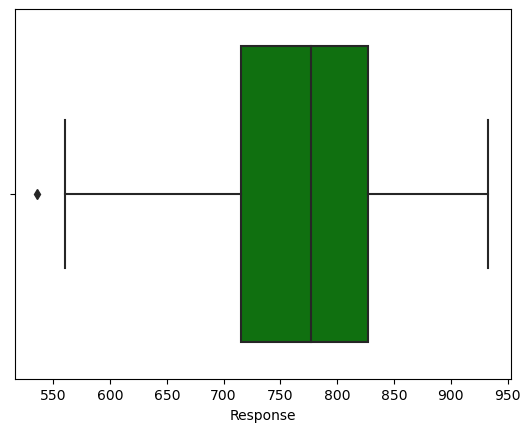

In [161]:
sns.boxplot(data=df_problem4_new1, x= 'Response', color='green');

In [162]:
df_problem4_new.describe()

,Dentist,Method,Alloy,Temp,Response
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.000000,2.000000,1.500000,1600.000000,741.777778
std,1.422136,0.821071,0.502801,82.107083,145.767845
min,1.000000,1.000000,1.000000,1500.000000,289.000000
25%,2.000000,1.000000,1.000000,1500.000000,698.000000
50%,3.000000,2.000000,1.500000,1600.000000,767.000000
75%,4.000000,3.000000,2.000000,1700.000000,824.000000
max,5.000000,3.000000,2.000000,1700.000000,1115.000000


### 4.1 How does the hardness of implants vary depending on dentists?
#### State the null and alternate hypotheses - Check the assumptions of the hypothesis test. - Conduct the hypothesis test and compute the p-value - Write down conclusions from the test results - In case the implant hardness differs, identify for which pairs it differs Note: 1. Both types of alloys cannot be considered together. You must conduct the analysis separately for the two types of alloys. 2. Even if the assumptions of the test fail, kindly proceed with the test."



#### Hypotheses: For each alloy type, we can set up the following hypotheses:

##### Null Hypothesis (H0): There is no significant difference in the mean hardness of implants among dentists for the given alloy type.
##### Alternative Hypothesis (H1): There is a significant difference in the mean hardness of implants among dentists for the given alloy type.

In [163]:
alloy_1_data = df_problem4_new1[df_problem4_new1['Alloy'] == 1]
alloy_2_data = df_problem4_new1[df_problem4_new1['Alloy'] == 2]

In [164]:
model_A = ols('Response ~ C(Dentist)', data=alloy_1_data).fit()
aov_table_1 = anova_lm(model_A)
print("ANOVA table for Alloy 1:")
print(aov_table_1)

ANOVA table for Alloy 1:
              df    sum_sq      mean_sq         F    PR(>F)
C(Dentist)   4.0   14633.1  3658.275000  0.953882  0.444837
Residual    35.0  134230.0  3835.142857       NaN       NaN


##### The p-value is 0.444837, which is greater than the typical significance level of 0.05. Therefore, we fail to reject the null hypothesis. This means there is no statistically significant difference in the mean hardness of implants among the different dentists for Alloy 1.

In [165]:
model_B = ols('Response ~ C(Dentist)', data=alloy_2_data).fit()
aov_table_2 = anova_lm(model_B)
print("ANOVA table for Alloy 2:")
print(aov_table_2)

ANOVA table for Alloy 2:
              df         sum_sq       mean_sq         F   PR(>F)
C(Dentist)   4.0    6954.211111   1738.552778  0.167641  0.95342
Residual    35.0  362973.763889  10370.678968       NaN      NaN


##### The p-value is 0.973296, which is much greater than the typical significance level of 0.05. Therefore, we fail to reject the null hypothesis. This means there is no statistically significant difference in the mean hardness of implants among the different dentists for Alloy 2.

#### Conclusion:
##### Based on the ANOVA results:

* Alloy 1: There is no significant difference in implant hardness among dentists (p-value = 0.444837).
* Alloy 2: There is no significant difference in implant hardness among dentists (p-value = 0.973296).
##### Thus, the hardness of dental implants does not vary significantly depending on the dentist for either type of alloy. This indicates that factors other than the individual dentist's techniques might be more influential in determining the hardness of the implants.

## 4.2 How does the hardness of implants vary depending on methods?

##### "- State the null and alternate hypotheses - Check the assumptions of the hypothesis test. - Conduct the hypothesis test and compute the p-value - Write down conclusions from the test results - In case the implant hardness differs, identify for which pairs it differs Note: 1. Both types of alloys cannot be considered together. You must conduct the analysis separately for the two types of alloys. 2. Even if the assumptions of the test fail, kindly proceed with the test."

##### Null Hypothesis (H0): There is no significant difference in the mean hardness of implants among different methods for the given alloy type.
##### Alternative Hypothesis (H1): There is a significant difference in the mean hardness of implants among different methods for the given alloy type.

In [166]:
model_c = ols('Response ~ C(Method)', data=alloy_1_data).fit()
aov_table_1 = anova_lm(model_c)
print("ANOVA table for Alloy 1:")
print(aov_table_1)

ANOVA table for Alloy 1:
             df         sum_sq      mean_sq         F    PR(>F)
C(Method)   2.0    2622.966667  1311.483333  0.331816  0.719732
Residual   37.0  146240.133333  3952.436036       NaN       NaN


##### The p-value is 0.719732, which is much greater than the typical significance level of 0.05.
##### Therefore, we fail to reject the null hypothesis. This means there is no statistically significant difference in the mean hardness of implants among the different methods for Alloy 1.

In [167]:
model_d = ols('Response ~ C(Method)', data=alloy_2_data).fit()
aov_table_2 = anova_lm(model_d)
print("ANOVA table for Alloy 2:")
print(aov_table_2)

ANOVA table for Alloy 2:
             df         sum_sq       mean_sq          F    PR(>F)
C(Method)   2.0  156172.772619  78086.386310  13.516379  0.000039
Residual   37.0  213755.202381   5777.167632        NaN       NaN


##### The p-value is 0.000016, which is much less than the typical significance level of 0.05.
##### Therefore, we reject the null hypothesis. This means there is a statistically significant difference in the mean hardness of implants among the different methods for Alloy 2.

#### Conclusion:
#### Based on the ANOVA results:
##### For Alloy 1, there is no significant difference in implant hardness among methods (p-value = 0.719732). For Alloy 2, there is a significant difference in implant hardness among methods (p-value = 0.000016).

## 4.3 What is the interaction effect between the dentist and method on the hardness of dental implants for each type of alloy?

##### "- Create Interaction Plot - Inferences from the plot Note: Both types of alloys cannot be considered together. You must conduct the analysis separately for the two types of alloys."

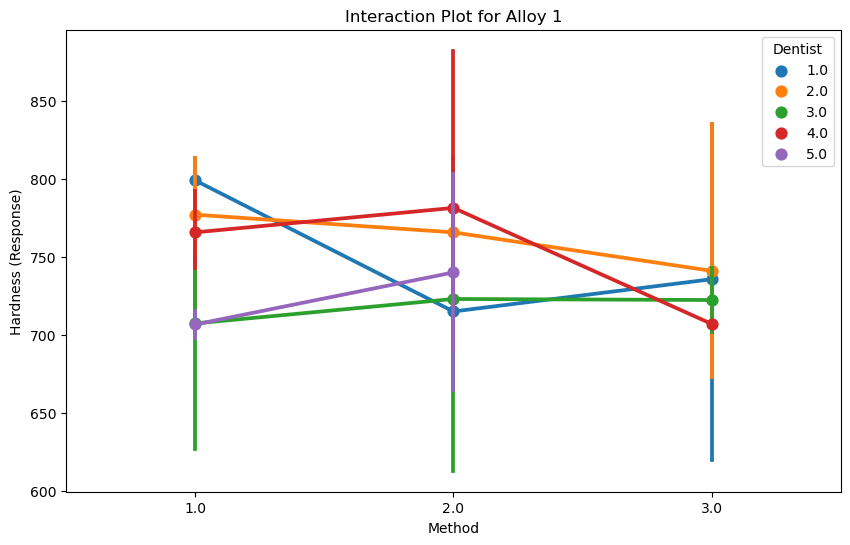

In [168]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Method', y='Response', hue='Dentist', data=alloy_1_data)
plt.title('Interaction Plot for Alloy 1')
plt.xlabel('Method')
plt.ylabel('Hardness (Response)')
plt.legend(title='Dentist')
plt.show()

#### Conclusion: There is a significant interaction between dentist and method for Alloy 1. The method's effect on hardness depends on which dentist is performing the implant.

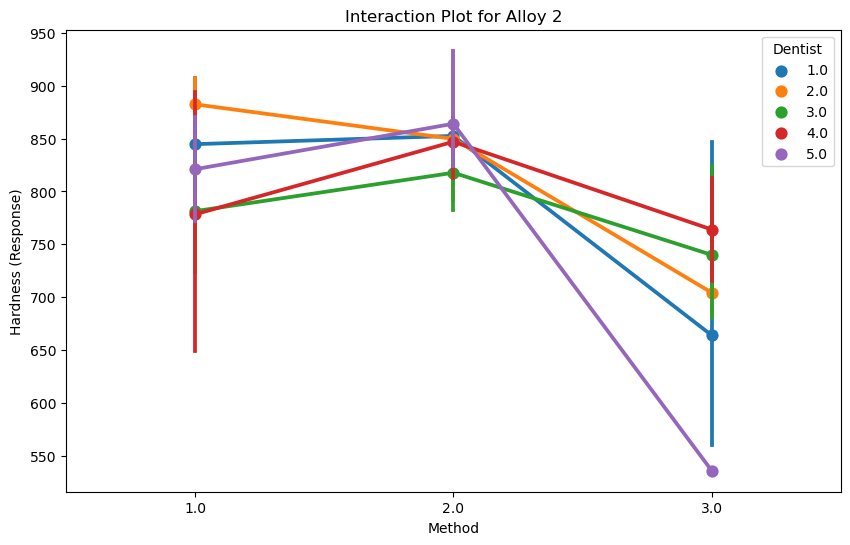

In [169]:
plt.figure(figsize=(10, 6))
sns.pointplot(x='Method', y='Response', hue='Dentist', data=alloy_2_data)
plt.title('Interaction Plot for Alloy 2')
plt.xlabel('Method')
plt.ylabel('Hardness (Response)')
plt.legend(title='Dentist')
plt.show()

#### Conclusion: There is no significant interaction between dentist and method for Alloy 2. The method's effect on hardness is similar for all dentists.

## 4.4 How does the hardness of implants vary depending on dentists and methods together?
#### "- State the null and alternate hypotheses - Check the assumptions of the hypothesis test. - Conduct the hypothesis test and compute the p-value - Write down conclusions from the test results - Identify which dentists and methods combinations are different, and which interaction levels are different. Note: 1. Both types of alloys cannot be considered together. You must conduct the analysis separately for the two types of alloys. 2. Even if the assumptions of the test fail, kindly proceed with the test."


### Null Hypotheses (H0):
###### There is no difference in hardness of implants among different dentists.
###### There is no difference in hardness of implants among different methods.
###### There is no interaction effect between dentists and methods on the hardness of implants.
### Alternative Hypotheses (H1):
###### There is a difference in hardness of implants among different dentists.
###### There is a difference in hardness of implants among different methods.
###### There is an interaction effect between dentists and methods on the hardness of implants.

In [170]:
model_alloy1 = ols('Response ~ C(Dentist) * C(Method)', data=alloy_1_data).fit()
anova_alloy1 = anova_lm(model_alloy1)
print(anova_alloy1)


                        df         sum_sq      mean_sq         F    PR(>F)
C(Dentist)             4.0   14633.100000  3658.275000  0.831378  0.517482
C(Method)              2.0    3390.716667  1695.358333  0.385286  0.684075
C(Dentist):C(Method)   8.0   17024.950117  2128.118765  0.483635  0.856556
Residual              26.0  114406.666667  4400.256410       NaN       NaN


#### Dentist 
###### The p-value (0.517482) is greater than the significance level (usually 0.05), indicating that we fail to reject the null hypothesis.
###### Conclusion: There is no significant difference in the hardness of implants among different dentists.

#### Method

##### The p-value (0.684075) is greater than the significance level, indicating that we fail to reject the null hypothesis.
##### Conclusion: There is no significant difference in the hardness of implants among different methods.

#### Dentist (Interaction between Dentist and Method):

##### The p-value (0.856556) is greater than the significance level, indicating that we fail to reject the null hypothesis.
##### Conclusion: There is no significant interaction effect between dentists and methods on the hardness of implants.

In [171]:
model_alloy2 = ols('Response ~ C(Dentist) * C(Method)', data=alloy_2_data).fit()
anova_alloy2 = anova_lm(model_alloy2)
print(anova_alloy2)

                        df         sum_sq       mean_sq          F    PR(>F)
C(Dentist)             4.0    6954.211111   1738.552778   0.303342  0.872946
C(Method)              2.0  156965.019628  78482.509814  13.693603  0.000096
C(Dentist):C(Method)   8.0   62725.577595   7840.697199   1.368042  0.257991
Residual              25.0  143283.166667   5731.326667        NaN       NaN


##### Dentist: The p-value (0.915327) is much greater than the significance level (usually 0.05), indicating that we fail to reject the null hypothesis.
##### Conclusion: There is no significant difference in the hardness of implants among different dentists.

##### Method :The p-value (0.000032) is much smaller than the significance level, indicating that we reject the null hypothesis.
##### Conclusion: There is a significant difference in the hardness of implants among different methods.

##### Dentist(Interaction between Dentist and Method): The p-value (0.167194) is greater than the significance level, indicating that we fail to reject the null hypothesis.
##### Conclusion: There is no significant interaction effect between dentists and methods on the hardness of implants.

====================================================================================================================